In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/DATA.csv')

print(df.shape)
df.head()

(31040, 17)


,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2ROJOb98GorxStuOuZWcGd,Have You Ever Loved A Woman?,Derek & The Dominos,61,1970-11-01,0.303,0.648,0,-6.795,1,0.6420,0.053000,0.4070,0.644,170.379,412960,3
1,2Qj1FilGsXITZbFVmVeoLy,I'm Tore Down,Freddie King,57,1971,0.640,0.496,2,-11.124,1,0.6160,0.000046,0.1830,0.954,116.632,253333,4
2,2FtX5tOFUVOyjcGQiuGR8f,"Damn Right, I've Got the Blues",Buddy Guy,57,1991,0.353,0.921,2,-5.640,1,0.0488,0.065000,0.3140,0.526,145.589,271653,3
3,6f3OYG5R630tjwFIHIE7j2,Scratch My Back,The Fabulous Thunderbirds,56,1979,0.775,0.499,4,-7.181,1,0.4960,0.021900,0.1140,0.862,121.056,232707,4
4,4VCl2a5JvdrEx6PL2P29ty,The Thrill Is Gone,B.B. King,0,2014-12-08,0.554,0.516,9,-6.819,0,0.2240,0.286000,0.0548,0.562,90.309,324267,4


In [3]:
# Check for null values
pd.isnull(df).sum()

id                  0
title               3
all_artists         3
popularity          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [4]:
# Drop rows containing null values as they aren't a significant number
df.dropna(inplace = True)
df.shape

(31037, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31037 entries, 0 to 31039
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                31037 non-null  object 
 1   title             31037 non-null  object 
 2   all_artists       31037 non-null  object 
 3   popularity        31037 non-null  int64  
 4   release_date      31037 non-null  object 
 5   danceability      31037 non-null  float64
 6   energy            31037 non-null  float64
 7   key               31037 non-null  int64  
 8   loudness          31037 non-null  float64
 9   mode              31037 non-null  int64  
 10  acousticness      31037 non-null  float64
 11  instrumentalness  31037 non-null  float64
 12  liveness          31037 non-null  float64
 13  valence           31037 non-null  float64
 14  tempo             31037 non-null  float64
 15  duration_ms       31037 non-null  int64  
 16  time_signature    31037 non-null  int64 

In [6]:
#Dropping duplicate songs
df.drop_duplicates(['id'], inplace = True)
df.shape

(27870, 17)

In [7]:
#A bit of feature engineering...

#change release_date to release_year
df['release_year'] = df['release_date'].apply(lambda x: x.split('-')[0])
df.drop(columns = ['release_date'], inplace = True)
    
#Change duration in miliseconds to seconds and drop duration_ms column
df['duration'] = df['duration_ms'].apply(lambda x: round(x/1000))
df.drop(columns = ['duration_ms'], inplace = True)
df.head(1)

,id,title,all_artists,popularity,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,duration
0,2ROJOb98GorxStuOuZWcGd,Have You Ever Loved A Woman?,Derek & The Dominos,61,0.303,0.648,0,-6.795,1,0.642,0.053,0.407,0.644,170.379,3,1970,413


In [8]:
#Statistical scores
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,27870.0,39.622497,25.102115,0.00000,21.00000,43.000000,59.00000,100.000
danceability,27870.0,0.592028,0.165613,0.00000,0.48800,0.605000,0.71200,0.988
energy,27870.0,0.664869,0.234058,0.00002,0.53200,0.715000,0.85000,0.999
key,27870.0,5.329171,3.569983,0.00000,2.00000,5.000000,9.00000,11.000
loudness,27870.0,-8.004077,4.953020,-47.07000,-9.50775,-6.650500,-4.89725,4.140
mode,27870.0,0.643846,0.478870,0.00000,0.00000,1.000000,1.00000,1.000
acousticness,27870.0,0.241479,0.301613,0.00000,0.01230,0.092250,0.38600,0.996
instrumentalness,27870.0,0.117902,0.269734,0.00000,0.00000,0.000064,0.01590,0.997
liveness,27870.0,0.186906,0.150947,0.01200,0.09280,0.126000,0.24200,0.987
valence,27870.0,0.537513,0.250584,0.00000,0.34400,0.546000,0.74100,0.993


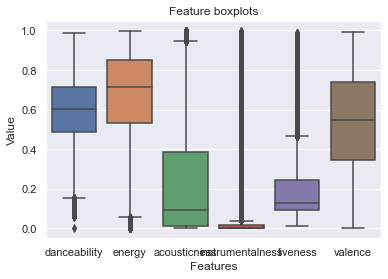

In [9]:
# Boxplot to display the above grid
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(data=df[['danceability', 'energy', 'acousticness', 'instrumentalness',
       'liveness', 'valence']]).set(title= 'Feature boxplots')
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

In [10]:
# Show artist by popularity
artist_by_pop = df.groupby('all_artists').sum().sort_values('popularity', ascending = False)[:10]
artist_by_pop

,popularity,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
all_artists,,,,,,,,,,,,,
Arctic Monkeys,5610,52.648,88.2250,642,-693.576,60,7.980844,7.062638,20.2815,64.0925,14221.163,451,22594
Taylor Swift,4254,37.230,39.0510,318,-392.969,51,11.764118,0.036907,8.5744,28.8292,7106.185,243,15035
Twenty One Pilots,2493,26.832,27.8901,224,-254.379,23,5.165138,0.391549,6.6220,21.9670,4965.878,163,9354
Drake,2311,26.726,21.8740,193,-227.425,19,4.680710,0.086586,6.0212,15.5004,4327.370,144,8243
The Strokes,2221,25.911,36.8570,228,-279.012,39,4.452308,16.904675,8.3933,28.9440,6179.638,197,10624
Coldplay,2203,16.629,21.7650,209,-246.449,22,5.654345,2.009529,5.5294,9.9815,4428.057,136,9029
Rihanna,2175,28.592,30.8810,289,-218.115,18,3.148585,0.436555,7.4572,24.6300,5197.995,167,10002
Kanye West,2159,28.733,30.0700,182,-261.722,24,6.834808,0.500965,12.8365,18.6358,5900.635,184,10906
Bruno Mars,2014,20.643,20.1440,125,-154.029,19,6.185680,0.000244,5.1593,18.5834,3514.803,116,6375


In [11]:
# 10 least popular songs in the dataset
least_popular = df.sort_values('popularity', ascending = True)
least_popular.head(10)

,id,title,all_artists,popularity,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,duration
11545,1kPhFYvB6gShi0ofBRNcky,Authority Song,John Mellencamp,0,0.503,0.965,2,-4.933,1,0.00394,0.000010,0.3220,0.967,156.087,4,2004,229
12433,72gGeQ0dZ7E8RlBeNJNJkb,The Monster,Rihanna,0,0.785,0.860,9,-3.642,1,0.05560,0.000000,0.0675,0.623,110.048,4,2013,251
12434,5uCdgBAqYPWQ2HGpJVGAeD,Get Up I Feel Like Being A Sex Machine - Pt. 1...,James Brown,0,0.802,0.661,10,-7.569,0,0.15700,0.000023,0.1730,0.799,107.774,4,2003,317
12437,5LN9F6c1Okx7Yrwd6GO8tu,I Want You Back,The Jackson 5,0,0.672,0.592,8,-8.175,1,0.47000,0.003930,0.1590,0.927,98.201,4,1996,180
12447,6Oz32JDEa6pohKJ1IGAwGX,Sweet Caroline,Neil Diamond,0,0.511,0.254,11,-10.501,1,0.32000,0.000782,0.2130,0.642,127.298,4,2001,201
12450,6ChXrnPVHITYgSu662eysA,Me And Mrs. You,Michael Bublé,0,0.622,0.338,10,-9.302,1,0.73100,0.000000,0.2290,0.613,117.169,3,2003,127
12452,7E3rc13GL2I5wA6CIFXaxs,L-O-V-E - Remastered,Nat King Cole,0,0.574,0.187,11,-14.762,0,0.69400,0.000000,0.0792,0.727,77.859,4,2000,153
12453,7Ek2kv9If3IjdMCRyeVm8g,Wonderful World,Sam Cooke,0,0.762,0.559,11,-10.307,1,0.51500,0.000000,0.2430,0.932,128.695,4,2003,127
12454,7coH7f2P7SiLxmo95b5QHX,Ain't That A Kick In The Head - 1997 - Remastered,Dean Martin,0,0.659,0.345,6,-7.893,0,0.61600,0.000000,0.2990,0.725,132.241,4,2004,145
12455,37r6i0GTqgR05rGe5wNhmp,"When They Fight, They Fight",Generationals,0,0.753,0.900,11,-1.866,0,0.26000,0.000102,0.1650,0.966,119.720,4,2009,200


In [12]:
# 10 most popular songs in the dataset
most_popular = least_popular.tail(10)
most_popular

,id,title,all_artists,popularity,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,duration
1336,5fwSHlTEWpluwOM0Sxnh5k,Pepas,Farruko,94,0.762,0.766,7,-3.955,1,0.00776,0.000070,0.1280,0.442,130.001,4,2021,287
25445,4ZtFanR9U6ndgddUvNcjcG,good 4 u,Olivia Rodrigo,95,0.563,0.664,9,-5.044,1,0.33500,0.000000,0.0849,0.688,166.928,4,2021,178
4285,6Uj1ctrBOjOas8xZXGqKk4,Woman,Doja Cat,95,0.824,0.764,5,-4.175,0,0.08880,0.002940,0.1170,0.881,107.998,4,2021,173
4359,20on25jryn53hWghthWWW3,Do It To It,Cherish,96,0.854,0.806,11,-8.262,0,0.02090,0.054200,0.0703,0.637,124.927,4,2021,158
5416,27NovPIUIRrOZoCHxABJwK,INDUSTRY BABY (feat. Jack Harlow),Jack Harlow,96,0.736,0.704,3,-7.409,0,0.02030,0.000000,0.0501,0.894,149.995,4,2021,212
4298,6zSpb8dQRaw0M1dK8PBwQz,Cold Heart - PNAU Remix,PNAU,96,0.796,0.798,1,-6.312,1,0.03400,0.000042,0.0952,0.942,116.032,4,2021,203
4337,0gplL1WMoJ6iYaPgMCL0gX,Easy On Me,Adele,96,0.604,0.366,5,-7.519,1,0.57800,0.000000,0.1330,0.130,141.981,4,2021,225
4274,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),Justin Bieber,97,0.591,0.764,1,-5.484,1,0.03830,0.000000,0.1030,0.478,169.928,4,2021,142
4356,1r9xUipOqoNwggBpENDsvJ,Enemy (with JID) - from the series Arcane Leag...,League of Legends,98,0.728,0.783,11,-4.424,0,0.23700,0.000000,0.4340,0.555,77.011,4,2021,173
4362,4fouWK6XVHhzl78KzQ1UjL,abcdefu,GAYLE,100,0.695,0.540,4,-5.692,1,0.29900,0.000000,0.3670,0.415,121.932,4,2021,169


In [13]:
#How many unique artists?
df.all_artists.nunique()

13565

In [14]:
df.all_artists.value_counts()[:10]

Arctic Monkeys           113
Johnny Cash               62
Taylor Swift              61
The Strokes               49
Kanye West                46
blink-182                 45
The Rolling Stones        45
Cage The Elephant         45
Red Hot Chili Peppers     45
Eminem                    43
Name: all_artists, dtype: int64

In [15]:
df.columns

Index(['id', 'title', 'all_artists', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'release_year',
       'duration'],
      dtype='object')

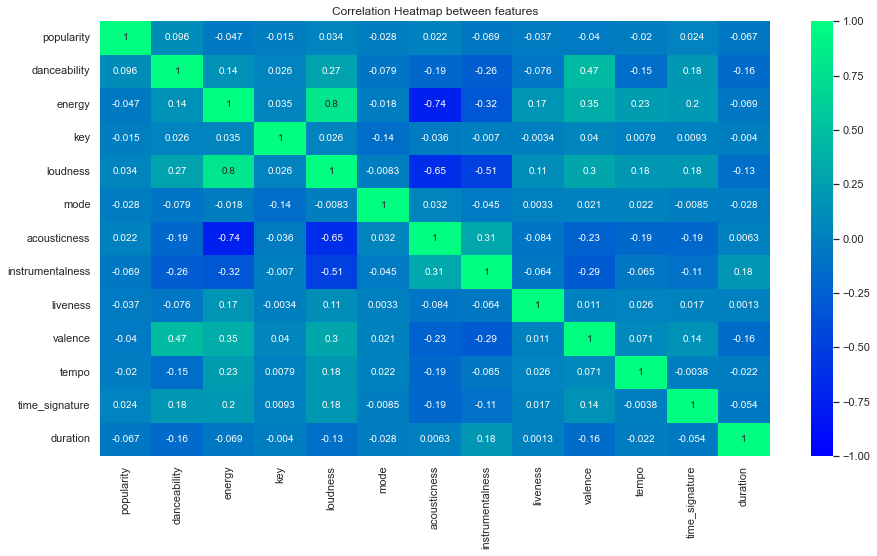

In [16]:
#Map the correlation of features
corr_df = df[['popularity', 'release_year',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'duration']].corr()

plt.figure(figsize = (15,8))
heatmap = sns.heatmap(corr_df,
                     annot = True,
                      vmin= -1,
                      vmax = 1,
                     cmap = 'winter',
                     linecolor='Black')
heatmap.set_title('Correlation Heatmap between features');

In [17]:
#Top 10 artists in terms of average energy compared to their average accousticness (really negative correlation between these features)
df[['all_artists','energy','acousticness']].groupby('all_artists').mean().sort_values(by='energy', ascending=False)[:10]

,energy,acousticness
all_artists,,
Thinktank,0.999,0.000238
Captain Jack,0.999,0.072600
Blushing Ocean Wave Sounds,0.999,0.365000
DJ Rentgen,0.999,0.023300
Paysage D'Hiver,0.999,0.002070
Jasad,0.999,0.000001
Timo Revna,0.999,0.001310
Agneton,0.999,0.012900
DJ Hush,0.999,0.000073


In [18]:
#How characteristics of songs change over the years
avgs_by_year = df[['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'release_year',
       'duration']].groupby('release_year').mean().sort_values(by='release_year').reset_index()
avgs_by_year.head()

,release_year,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,1900,0.582,0.5890,-8.647,0.0574,0.00326,0.3130,0.466,131.979,288.0
1,1921,0.757,0.5040,-8.157,0.9260,0.92800,0.2610,0.944,94.325,159.0
2,1923,0.614,0.0423,-12.033,0.9960,0.00293,0.1830,0.211,89.822,177.0
3,1926,0.498,0.2580,-12.622,0.9640,0.00486,0.1240,0.687,82.476,188.0
4,1927,0.541,0.0946,-19.886,0.8820,0.00000,0.0979,0.470,166.893,193.0


([<matplotlib.axis.XTick at 0x7fbe266cb8e0>], [Text(0, 0, '')])

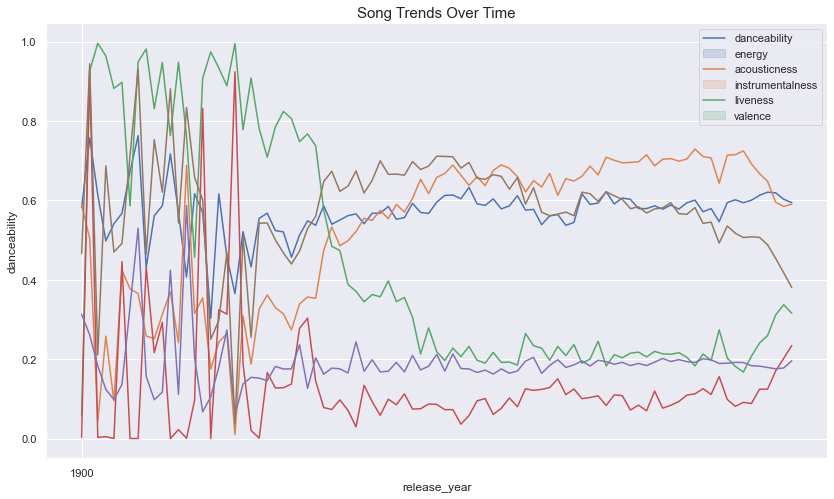

In [40]:
#Plot these changes
plt.figure(figsize=(14,8))
plt.title("Song Trends Over Time", fontsize=15)
lines = ['danceability', 'energy', 'acousticness', 'instrumentalness',
       'liveness', 'valence']
for line in lines:
    ax = sns.lineplot(x='release_year', y=line, data= avgs_by_year)
plt.legend(lines);
plt.xticks(np.arange(0,1,step=10))
